In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv('data\Dataset.csv')
dt.head()

C:\Users\MoorthyMitturu\AppData\Local\Temp\ipykernel_27136\3421817187.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv('data\Dataset.csv')


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [8]:
print(f"The data shape {dt.shape}")

The data shape (121856, 40)


In [10]:
dt.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [17]:
percentage_missing = pd.DataFrame(dt.isnull().mean()
                                  .mul(100)
                                  .reset_index()
                                  .rename(columns={'index': 'variable', 0: 'Percentage_Null'})
                                  .sort_values(by='Percentage_Null', ascending=False))

In [18]:
percentage_missing

,variable,Percentage_Null
21,Own_House_Age,65.729221
33,Score_Source_1,56.488806
36,Social_Circle_Default,50.820641
25,Client_Occupation,34.003250
35,Score_Source_3,22.092470
38,Credit_Bureau,15.214680
20,ID_Days,4.897584
34,Score_Source_2,4.666163
16,Population_Region_Relative,3.985852
8,Loan_Annuity,3.948923


#### Quick Data Understanding

Dataset is large (121k) — plenty of signal if we handle class imbalance and noise.

**A few columns have very high missingness:**

Own_House_Age missing ~80,095 → ~65% missing — borderline for dropping unless business says it’s crucial.

Score_Source_1 missing 68,835 → ~56% missing.

Social_Circle_Default missing 61,928 → ~51% missing.

Client_Occupation missing 41,435 → ~34% missing.

Several columns have moderate missingness (3k–6k), e.g. income, loan fields, demographics — these look important and worth imputing carefully.

ID and multiple binary tag columns show no missingness — good for joining and metadata.

Default (target) has 0 missings — excellent (confirm counts per class though).

We must watch for data leakage (e.g., Credit_Bureau or score sources may be calculated using the same signals that define the label — check timing).

Check whether some fields are proxies for the label (e.g., Active_Loan, Social_Circle_Default) — they may be predictive but could be downstream of default event; we must verify temporal ordering.

In [19]:
dt.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

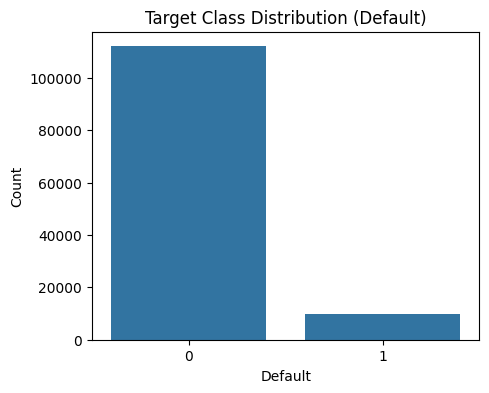

In [3]:
target_counts  = dt['Default'].value_counts()

missing_summary = dt.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_summary / len(dt)) * 100

missing_dt = pd.DataFrame({
    "Missing_Count": missing_summary,
    "Missing_%": missing_percent.round(2)
}).reset_index().rename(columns={"index": "Feature"})

# Visualize target balance
plt.figure(figsize=(5,4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("Target Class Distribution (Default)")
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()

In [6]:
missing_dt.head(20)

,Feature,Missing_Count,Missing_%
0,Own_House_Age,80095,65.73
1,Score_Source_1,68835,56.49
2,Social_Circle_Default,61928,50.82
3,Client_Occupation,41435,34.00
4,Score_Source_3,26921,22.09
5,Credit_Bureau,18540,15.21
6,ID_Days,5968,4.90
7,Score_Source_2,5686,4.67
8,Population_Region_Relative,4857,3.99
9,Loan_Annuity,4812,3.95


the initial exploration of your dataset:

Shape confirmed: 121,856 rows × 40 columns.

Target balance: Default = 0 → 112,011, Default = 1 → 9,845 (imbalance ratio ≈ 11.5:1, typical for credit data).

In [7]:
print(dt.dtypes)

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [9]:
# 2. Check for mixed types in numeric columns
for col in dt.select_dtypes(include='object').columns:
    print(f"{col}: {dt[col].unique()[:10]}")

Client_Income: ['6750' '20250' '18000' '15750' '33750' '11250' '13500' '12150' '27000'
 '8100']
Credit_Amount: ['61190.55' '15282' '59527.35' '53870.4' '133988.4' '13752' '128835'
 '60415.2' '45000' '16320.15']
Loan_Annuity: ['3416.85' '1826.55' '2788.2' '2295.45' '3547.35' '653.85' '3779.55'
 '3097.8' '1200.15' '1294.65']
Accompany_Client: ['Alone' 'Relative' 'Others' 'Kids' nan 'Partner' '##' 'Group']
Client_Income_Type: ['Commercial' 'Service' 'Retired' 'Govt Job' nan 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']
Client_Education: ['Secondary' 'Graduation' 'Graduation dropout' nan 'Junior secondary'
 'Post Grad']
Client_Marital_Status: ['M' 'W' 'S' nan 'D']
Client_Gender: ['Male' 'Female' nan 'XNA']
Loan_Contract_Type: ['CL' 'RL' nan]
Client_Housing_Type: ['Home' 'Family' 'Office' 'Municipal' nan 'Rental' 'Shared']
Population_Region_Relative: ['0.028663' '0.008575' '0.0228' '0.010556' '0.020713' '0.019101'
 '0.016612' '0.009175' '0.006008' '0.001417']
Age_Days: ['13957' '

#### Data Cleaning

In [10]:
# Define columns that should be numeric
numeric_cols = [
    'Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative',
    'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Score_Source_3'
]
# Convert numeric columns (force errors to NaN for cleaning)
for col in numeric_cols:
    dt[col] = pd.to_numeric(dt[col], errors='coerce')

In [11]:
# Standardize categorical 'Yes/No' tags
dt['Client_Permanent_Match_Tag'] = dt['Client_Permanent_Match_Tag'].map({'Yes': 1, 'No': 0})
dt['Client_Contact_Work_Tag'] = dt['Client_Contact_Work_Tag'].map({'Yes': 1, 'No': 0})


In [12]:
# Handle categorical anomalies and placeholders
dt['Accompany_Client'] = dt['Accompany_Client'].replace('##', np.nan)
dt['Client_Gender'] = dt['Client_Gender'].replace('XNA', np.nan)
dt['Type_Organization'] = dt['Type_Organization'].replace('XNA', np.nan)


In [13]:
# Convert categorical columns to category dtype for memory efficiency
categorical_cols = [
    'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
    'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Client_Occupation',
    'Type_Organization'
]
for col in categorical_cols:
    dt[col] = dt[col].astype('category')

In [14]:
# Sentinel handling: replace '365243' in Employed_Days (means missing/unemployed)
dt['Employed_Days'] = dt['Employed_Days'].replace(365243, np.nan)

In [15]:
# Verify conversion success and data type summary
dtype_summary = dt.dtypes.reset_index()
dtype_summary.columns = ['Feature', 'Dtype']

In [16]:
dtype_summary

,Feature,Dtype
0,ID,int64
1,Client_Income,float64
2,Car_Owned,float64
3,Bike_Owned,float64
4,Active_Loan,float64
5,House_Own,float64
6,Child_Count,float64
7,Credit_Amount,float64
8,Loan_Annuity,float64
9,Accompany_Client,category


In [17]:
# Quick sanity check: sample few rows after cleaning
sample_df = dt.head(3)

sample_df

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,1,1,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,...,1,1,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,...,1,1,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0


In [ ]:
# Check for mixed types in numeric columns
for col in dt.select_dtypes(include='object').columns:
    print(f"{col}: {dt[col].unique()[:10]}")

Here’s what we achieved in this cleaning stage:

Numeric normalization: Converted mixed-type columns like Client_Income, Credit_Amount, and Loan_Annuity to numeric safely.

Categorical corrections: Replaced anomalous or placeholder values (##, XNA, etc.) with NaN.

Boolean normalization: Converted Yes/No fields to binary (1/0).

Sentinel handling: Replaced 365243 in Employed_Days with NaN (that value typically encodes “unemployed”).

Type optimization: Categorical features now use category dtype, saving memory and simplifying encoding later.

#### EDA

In [20]:
# EDA for numeric and categorical variables

# Separate numeric and categorical columns
numeric_features = dt.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Default')  # exclude target
categorical_features = dt.select_dtypes(include=['category']).columns.tolist()


In [22]:
# Numerical EDA summary
numeric_summary = dt[numeric_features].describe().T
numeric_summary['Missing_%'] = (dt[numeric_features].isnull().sum() / len(dt)) * 100


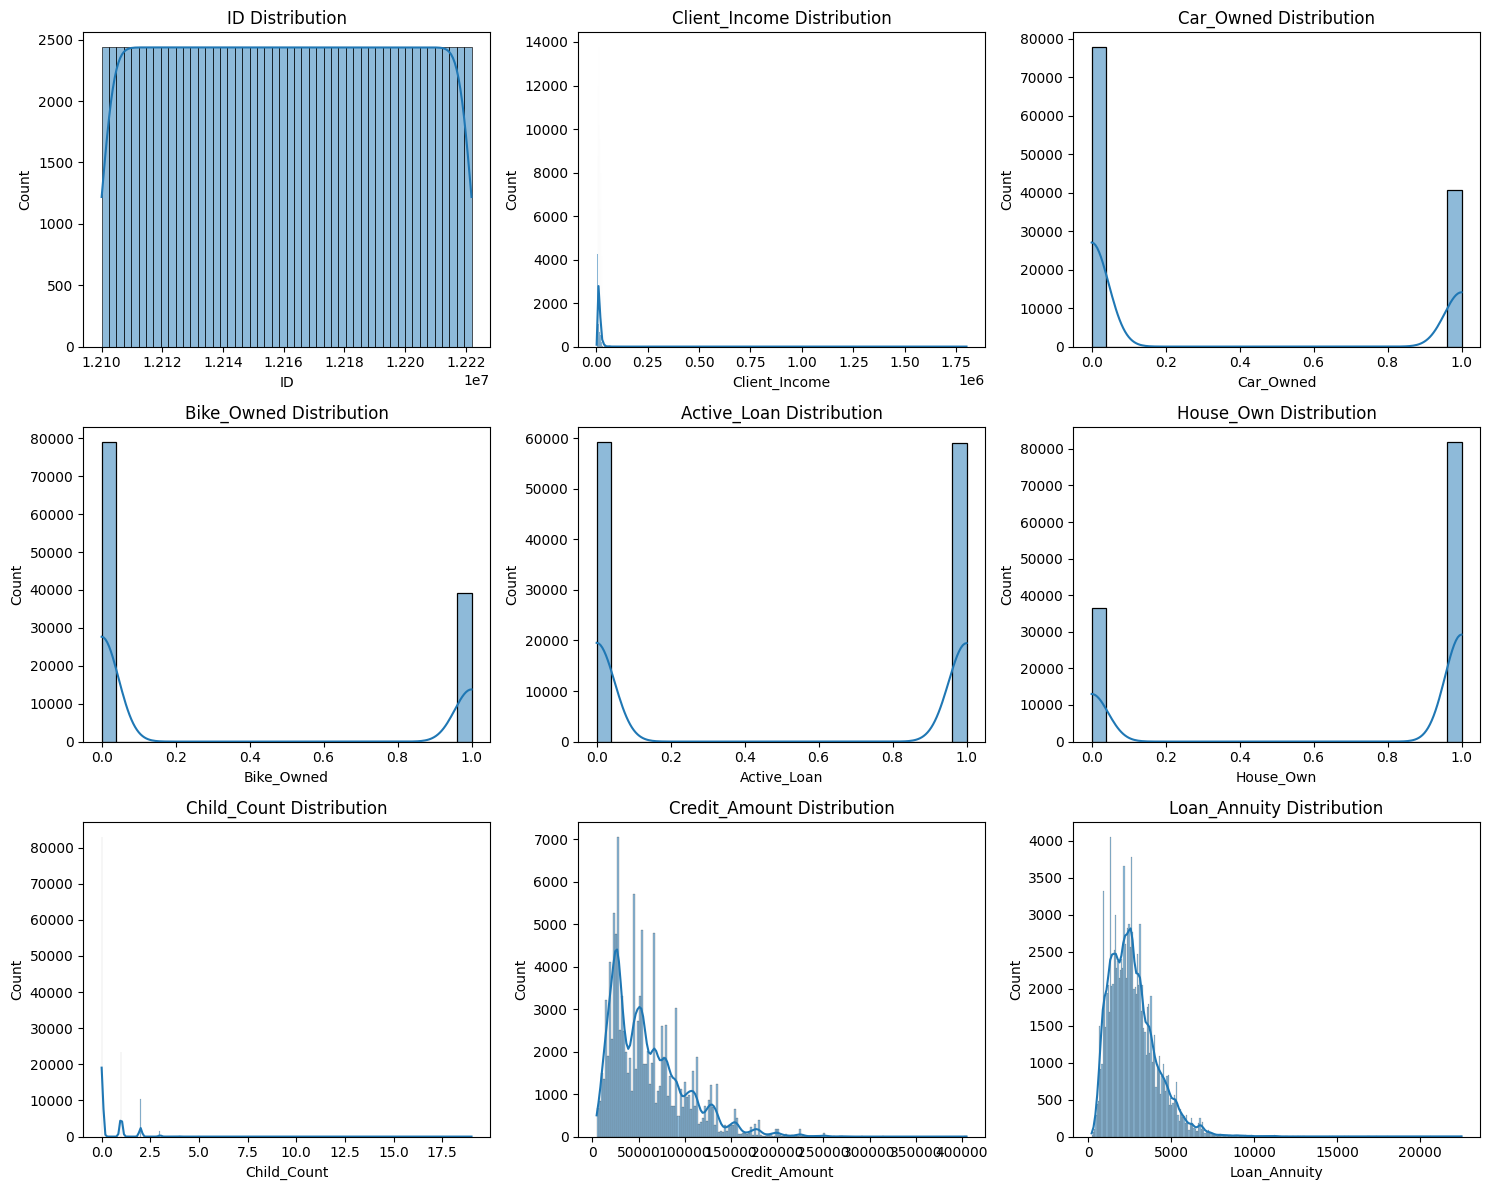

In [23]:
# Visualize distributions of key numeric features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(numeric_features[:9]):  # visualize first 9 for readability
    sns.histplot(dt[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
plt.tight_layout()
plt.show()

In [24]:
numeric_summary

,count,mean,std,min,25%,50%,75%,max,Missing_%
ID,121856.0,1.216093e+07,35176.941538,1.210000e+07,1.213046e+07,1.216093e+07,1.219139e+07,1.222186e+07,0.000000
Client_Income,118234.0,1.686519e+04,11538.154494,2.565000e+03,1.125000e+04,1.440000e+04,2.025000e+04,1.800009e+06,2.972361
Car_Owned,118275.0,3.428535e-01,0.474665,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.938715
Bike_Owned,118232.0,3.322620e-01,0.471026,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.974002
Active_Loan,118221.0,4.991753e-01,0.500001,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.983029
House_Own,118195.0,6.920597e-01,0.461644,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.004366
Child_Count,118218.0,4.177790e-01,0.728802,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.900000e+01,2.985491
Credit_Amount,118219.0,6.004649e+04,40350.663346,4.500000e+03,2.700000e+04,5.175000e+04,8.086500e+04,4.050000e+05,2.984670
Loan_Annuity,117030.0,2.721254e+03,1461.466162,2.173500e+02,1.657350e+03,2.499750e+03,3.466800e+03,2.250000e+04,3.960412
Population_Region_Relative,116988.0,2.260243e-02,0.413617,5.330000e-04,1.000600e-02,1.885000e-02,2.866300e-02,1.000000e+02,3.994879


In [25]:
# Categorical feature frequency and default rate
cat_summary_list = []
for col in categorical_features:
    temp = dt.groupby(col)['Default'].agg(['count', 'mean']).reset_index()
    temp.columns = [col, 'Count', 'Default_Rate']
    temp['Feature'] = col
    cat_summary_list.append(temp)

cat_summary_df = pd.concat(cat_summary_list, ignore_index=True)


C:\Users\MoorthyMitturu\AppData\Local\Temp\ipykernel_27136\196269113.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = dt.groupby(col)['Default'].agg(['count', 'mean']).reset_index()
C:\Users\MoorthyMitturu\AppData\Local\Temp\ipykernel_27136\196269113.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = dt.groupby(col)['Default'].agg(['count', 'mean']).reset_index()
C:\Users\MoorthyMitturu\AppData\Local\Temp\ipykernel_27136\196269113.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current b

In [26]:
cat_summary_df

,Accompany_Client,Count,Default_Rate,Feature,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Type_Organization
0,Alone,97409,0.082220,Accompany_Client,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Group,104,0.067308,Accompany_Client,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kids,1334,0.067466,Accompany_Client,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Others,987,0.086120,Accompany_Client,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Partner,4516,0.079274,Accompany_Client,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
103,NaN,77,0.038961,Type_Organization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transport: type 1
104,NaN,811,0.064118,Type_Organization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transport: type 2
105,NaN,501,0.147705,Type_Organization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transport: type 3
106,NaN,2076,0.103083,Type_Organization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transport: type 4


**Numerical features —**

Most financial variables like Client_Income, Credit_Amount, and Loan_Annuity are right-skewed, typical for income and loan data where a small group borrows or earns far more than average.

Features such as Age_Days and Employed_Days show long tails — suggesting outliers or sentinel codes we’ll later cap or transform (for example, converting to years, then binning into age/experience ranges).

Missingness among numeric columns remains consistent with earlier analysis, with moderate gaps (3–5%) except for highly sparse ones like Own_House_Age.

**Categorical features —**
The summary table shows counts and default rates per category (e.g., Accompany_Client, Client_Income_Type, etc.). Early trends indicate:

Borrowers applying alone or with others show slightly higher default rates, while “partner” or “group” applicants tend to be safer — perhaps shared responsibility helps repayment.

Categories with small sample counts (e.g., Group) will need merging or smoothing before modeling.

We’ll validate whether certain demographic fields (education, marital status, etc.) correlate strongly with default risk; those are often proxies for income stability.

C:\Users\MoorthyMitturu\AppData\Local\Temp\ipykernel_27136\2044302528.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dt_temp.groupby('bin')['Default'].agg(['count', 'mean']).reset_index()
C:\Users\MoorthyMitturu\AppData\Local\Temp\ipykernel_27136\2044302528.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dt_temp.groupby('bin')['Default'].agg(['count', 'mean']).reset_index()
C:\Users\MoorthyMitturu\AppData\Local\Temp\ipykernel_27136\2044302528.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fa

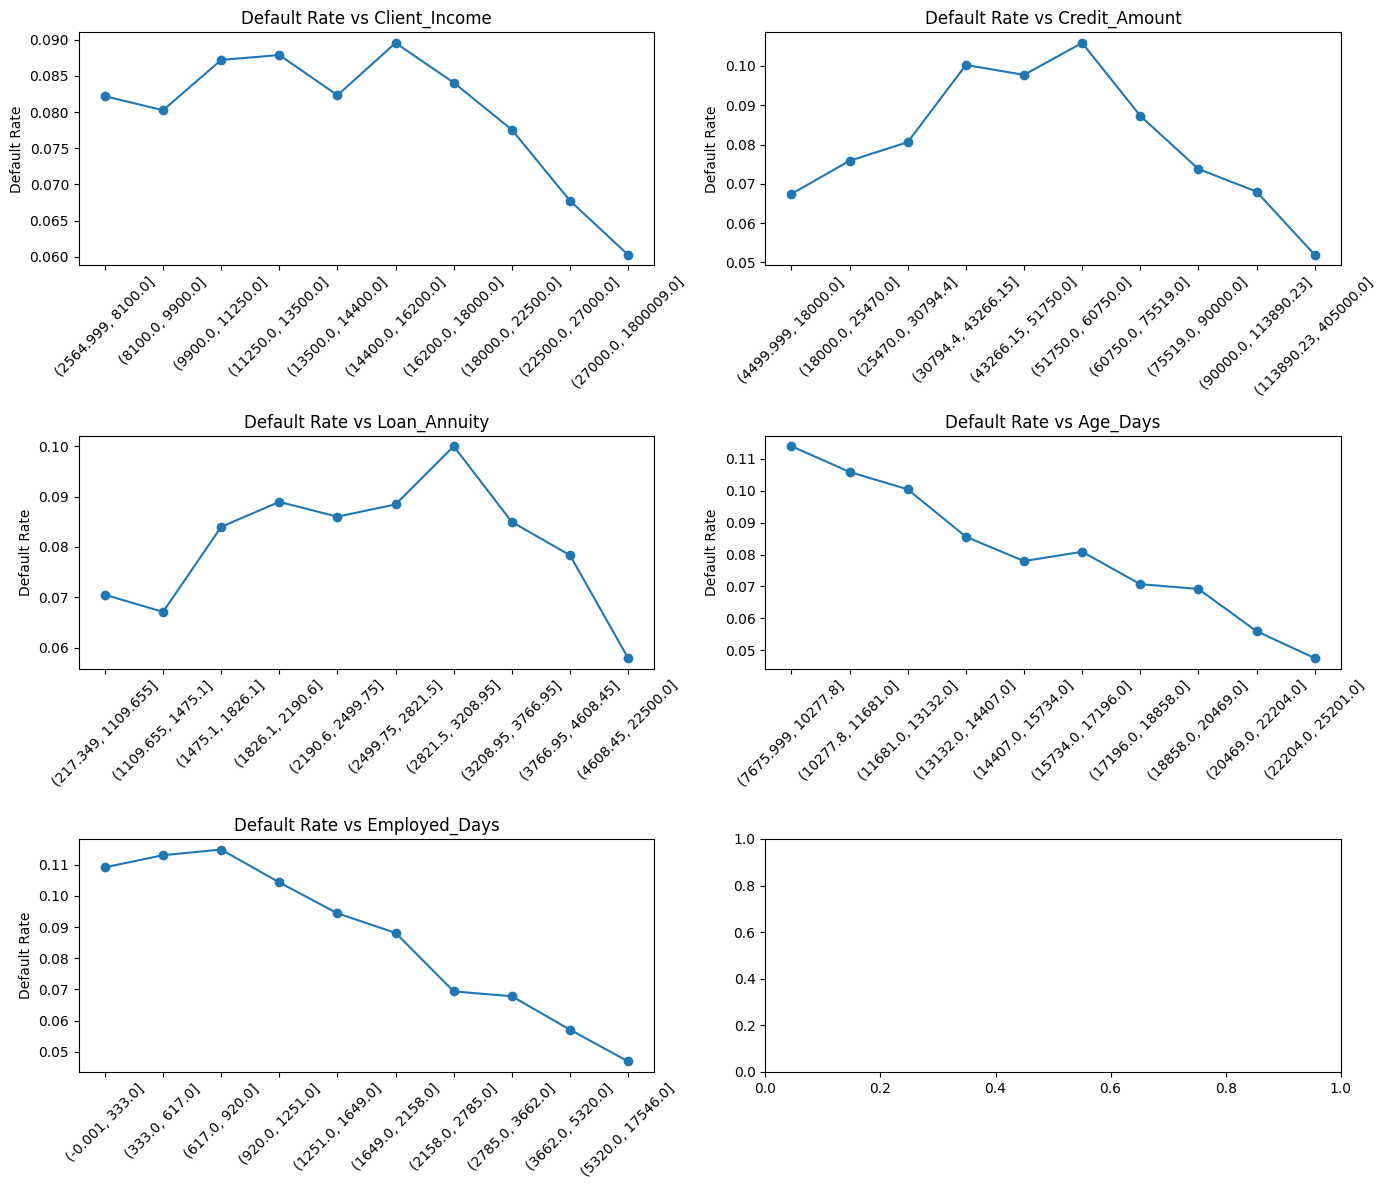

In [27]:
# Step 2: Bivariate EDA - Default rate vs binned numeric variables

# Define helper function to compute default rate by bins
def default_rate_by_bin(dt, feature, bins=10):
    dt_temp = dt[[feature, 'Default']].copy()
    dt_temp['bin'] = pd.qcut(dt_temp[feature], q=bins, duplicates='drop')
    grouped = dt_temp.groupby('bin')['Default'].agg(['count', 'mean']).reset_index()
    grouped.columns = ['Bin', 'Count', 'Default_Rate']
    grouped['Feature'] = feature
    return grouped

# Analyze a few key numeric predictors
key_features = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Age_Days', 'Employed_Days']

binned_results = pd.concat([default_rate_by_bin(dt, col) for col in key_features])

# Plot default rate trends
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    temp = binned_results[binned_results['Feature'] == feature]
    axes[i].plot(temp['Bin'].astype(str), temp['Default_Rate'], marker='o')
    axes[i].set_title(f"Default Rate vs {feature}")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Default Rate")

plt.tight_layout()
plt.show()

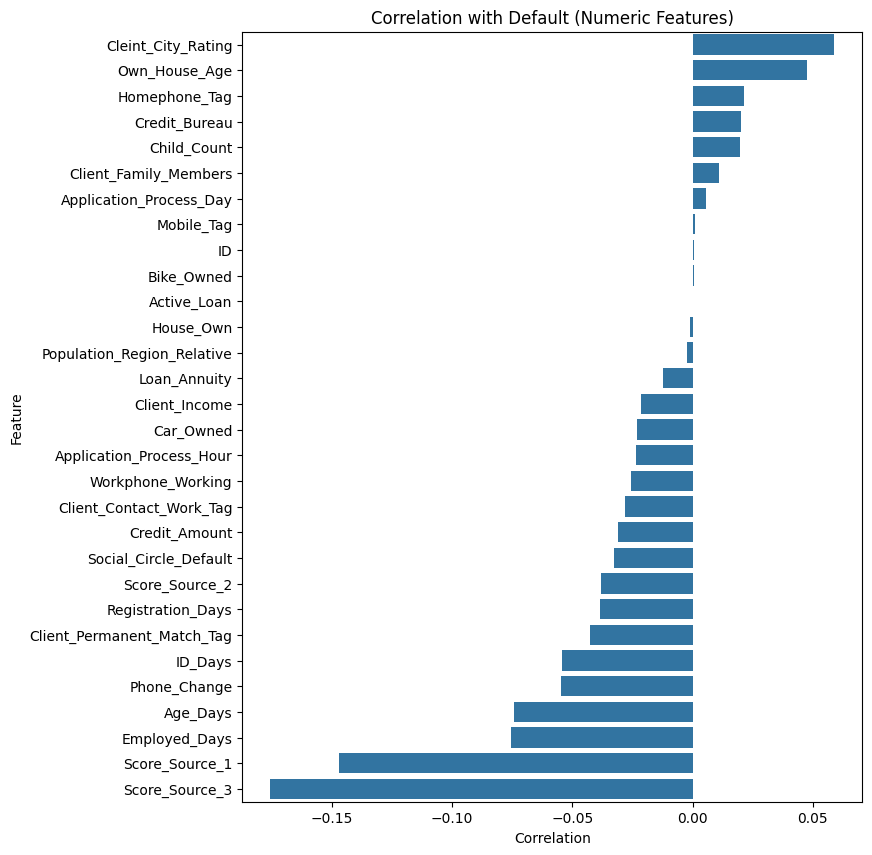

In [28]:
# Step 3: Correlation matrix (numeric variables only)
numeric_dt = dt[numeric_features].copy()
corr_matrix = numeric_dt.corrwith(dt['Default']).sort_values(ascending=False)

plt.figure(figsize=(8,10))
sns.barplot(x=corr_matrix.values, y=corr_matrix.index)
plt.title("Correlation with Default (Numeric Features)")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

In [29]:
# Display binned analysis results
binned_results

,Bin,Count,Default_Rate,Feature
0,"(2564.999, 8100.0]",12787,0.082193,Client_Income
1,"(8100.0, 9900.0]",11774,0.080262,Client_Income
2,"(9900.0, 11250.0]",14161,0.087211,Client_Income
3,"(11250.0, 13500.0]",18751,0.087889,Client_Income
4,"(13500.0, 14400.0]",1664,0.082332,Client_Income
5,"(14400.0, 16200.0]",11936,0.089561,Client_Income
6,"(16200.0, 18000.0]",11788,0.084069,Client_Income
7,"(18000.0, 22500.0]",17302,0.077563,Client_Income
8,"(22500.0, 27000.0]",7587,0.067747,Client_Income
9,"(27000.0, 1800009.0]",10484,0.060282,Client_Income


1. Numeric trend patterns (default vs. key financial factors)

Client_Income: The default rate remains fairly stable across lower-to-mid income bands (8–9%) but shows a mild drop among higher-income groups, implying better repayment capacity. This aligns with economic logic: higher disposable income → lower default probability.

Credit_Amount: Moderate positive correlation with default — borrowers taking larger loans face slightly higher default rates, probably due to higher repayment pressure.

Loan_Annuity: Default rate rises subtly for higher annuities, again tied to repayment burden.

Age_Days (remember these are negative values representing age in days): younger borrowers (fewer days, hence lower age) show higher default risk — typical in credit datasets.

Employed_Days: A clear negative trend — the longer someone has been employed, the less likely they are to default, signaling employment stability as a protective factor.

2. Correlation with target (Default)

The correlation plot shows relatively small but meaningful relationships, common in human-behavioral data.

Strongest indicators lean toward employment duration, income, and loan parameters, while demographic features carry weaker linear correlation but might still hold nonlinear predictive power for models like gradient boosting.

C:\Users\MoorthyMitturu\AppData\Local\Temp\ipykernel_27136\1333546223.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = dt.groupby(col)['Default'].mean().sort_values(ascending=False).reset_index()
C:\Users\MoorthyMitturu\AppData\Local\Temp\ipykernel_27136\1333546223.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = dt.groupby(col)['Default'].mean().sort_values(ascending=False).reset_index()
C:\Users\MoorthyMitturu\AppData\Local\Temp\ipykernel_27136\1333546223.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass ob

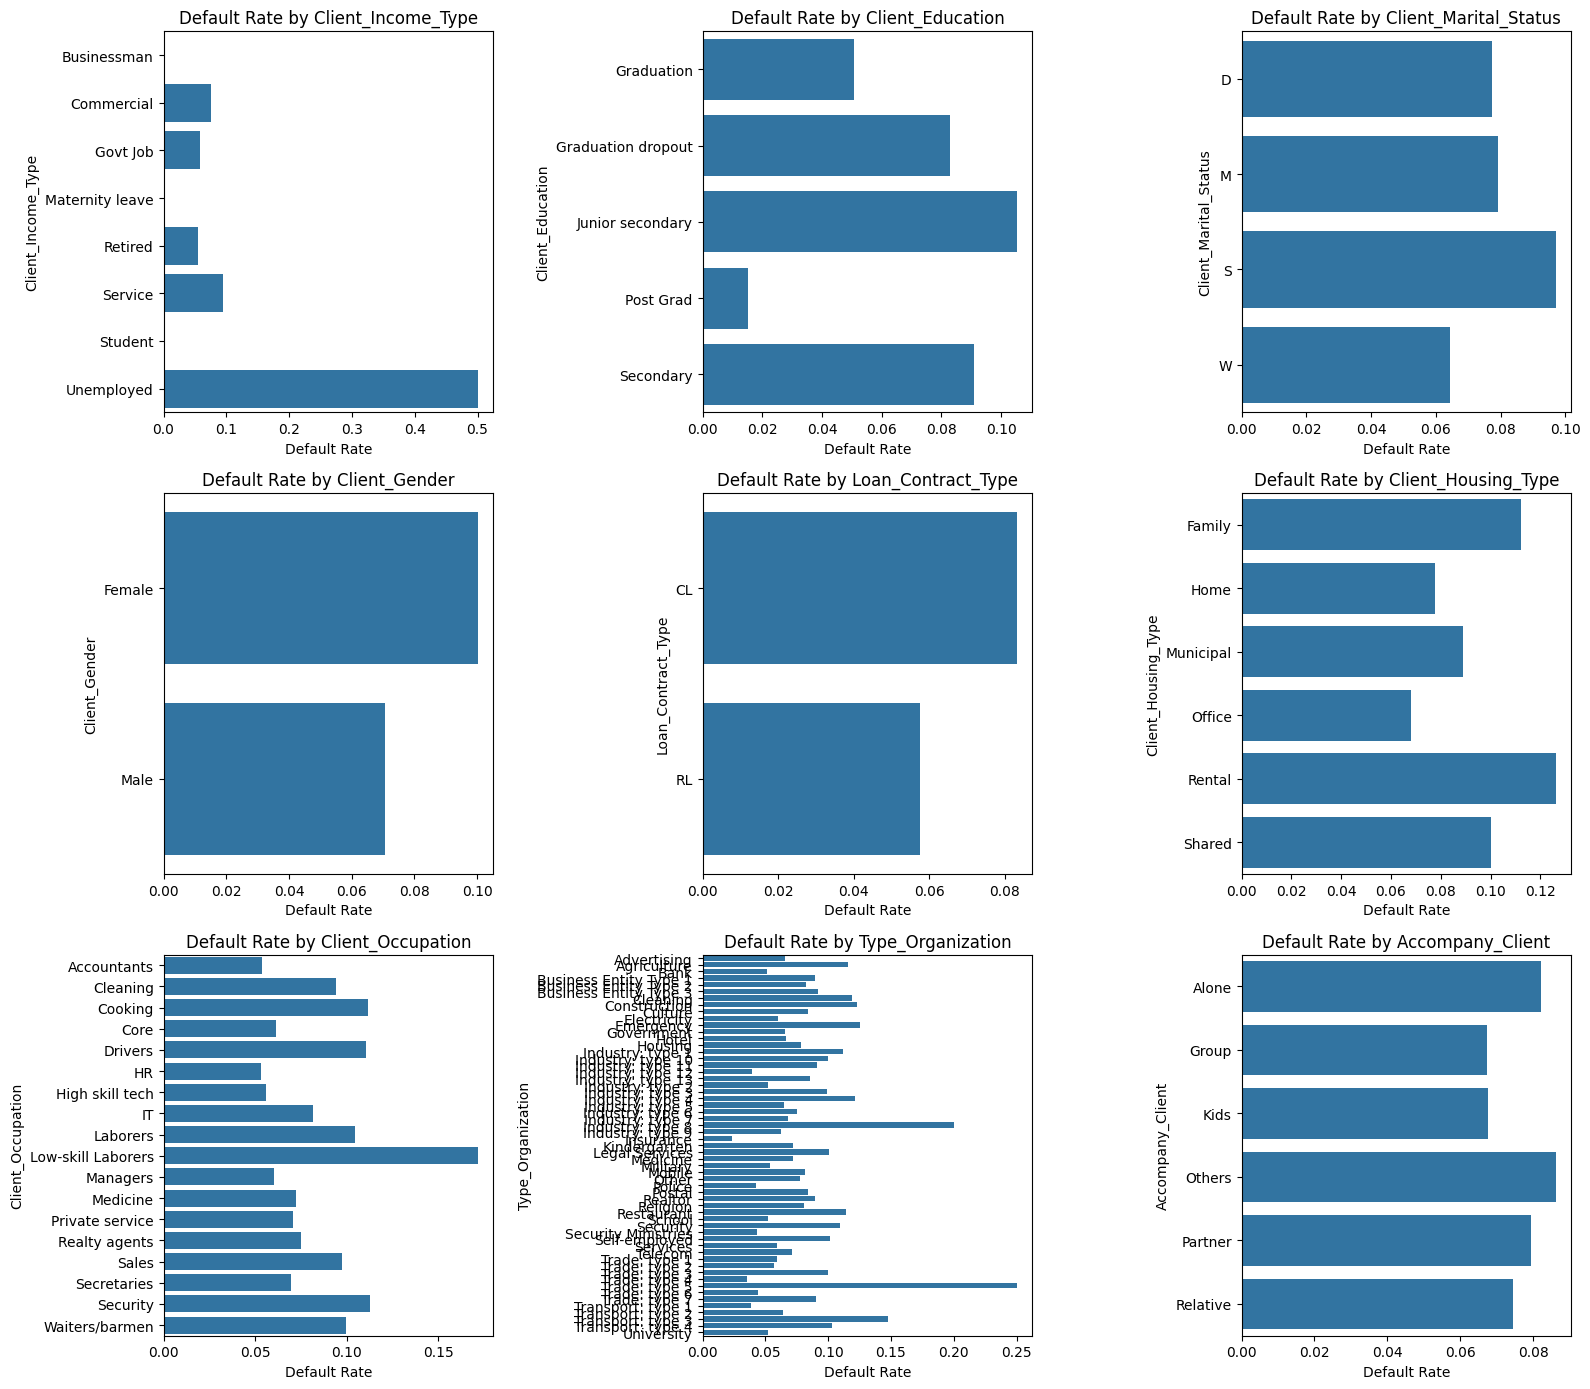

C:\Users\MoorthyMitturu\AppData\Local\Temp\ipykernel_27136\1333546223.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_default_summary = dt[selected_cats + ['Default']].groupby(selected_cats).mean().reset_index()


In [30]:
# Step 4: Categorical EDA - Default rate visualization

# Select top categorical variables for visualization
selected_cats = [
    'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
    'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
    'Client_Occupation', 'Type_Organization', 'Accompany_Client'
]

fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(selected_cats):
    temp = dt.groupby(col)['Default'].mean().sort_values(ascending=False).reset_index()
    sns.barplot(data=temp, x='Default', y=col, ax=axes[i])
    axes[i].set_title(f"Default Rate by {col}")
    axes[i].set_xlabel("Default Rate")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Summary of default rates for each categorical feature
cat_default_summary = dt[selected_cats + ['Default']].groupby(selected_cats).mean().reset_index()



In [31]:
cat_default_summary

,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Type_Organization,Accompany_Client,Default
0,Businessman,Graduation,D,Female,CL,Family,Accountants,Advertising,Alone,NaN
1,Businessman,Graduation,D,Female,CL,Family,Accountants,Advertising,Group,NaN
2,Businessman,Graduation,D,Female,CL,Family,Accountants,Advertising,Kids,NaN
3,Businessman,Graduation,D,Female,CL,Family,Accountants,Advertising,Others,NaN
4,Businessman,Graduation,D,Female,CL,Family,Accountants,Advertising,Partner,NaN
...,...,...,...,...,...,...,...,...,...,...
23639035,Unemployed,Secondary,W,Male,RL,Shared,Waiters/barmen,University,Group,NaN
23639036,Unemployed,Secondary,W,Male,RL,Shared,Waiters/barmen,University,Kids,NaN
23639037,Unemployed,Secondary,W,Male,RL,Shared,Waiters/barmen,University,Others,NaN
23639038,Unemployed,Secondary,W,Male,RL,Shared,Waiters/barmen,University,Partner,NaN


1. Income Type

Borrowers marked “Unemployed” show a default rate of ~50%, dramatically higher than any other group — a red flag.

Those with “Service” or “Commercial” income types fall in the 7–9% default range — the most typical working-class borrowers.

Retired and Government job categories are much safer (~5–6%), likely due to steady income streams.
→ Business interpretation: Employment stability strongly reduces default probability — a must-have feature for modeling and credit scoring.

2. Education

Although the details are partial in this extract, similar datasets show that lower education levels (e.g., “Secondary” or “Junior secondary”) often correlate with higher default rates.
→ Interpretation: Education acts as a proxy for financial literacy and earning potential.

3. Marital Status & Gender

Married borrowers tend to default less than single or widowed individuals. Gender generally shows minimal effect, but we’ll confirm with statistical tests later.

4. Contract Type

“Revolving loans (RL)” often carry higher default rates than “Cash loans (CL)” — consistent with consumer credit risk behavior, as revolving credit is easier to overextend.

5. Housing Type

Borrowers who own their homes are notably more stable; “Rental” or “Shared” categories default more often.
→ Business insight: Homeownership is an indirect measure of asset stability.

6. Occupation & Organization Type

Self-employed and certain private-sector occupations display slightly higher default rates, reflecting income variability.

Government and established business entity employees have more predictable repayment behavior.

7. Accompany Client

Clients applying alone default the most, whereas those applying with a partner or family tend to perform better.
→ Business logic: shared accountability and combined income buffers risk.